In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [67]:
# read our data
df = pd.read_csv(R"D:\OneDrive\Documents\DATA SCIENCE\KAGGLE\ClassificationWithAnAcademicSuccessDataset\data\playground-series-s4e6\data2.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),...,Course_9238,Course_9853,Father student,Father intermediate technicians and professionals,Father in personal service,Father other situations and unknown,Mother student,Mother no education,Father basic education,Target
0,1,126.0,122.6,0,0,1,0,1,18,0,...,1,0,0,0,1,0,0,0,1,Graduate
1,1,125.0,119.8,1,0,1,0,0,18,0,...,1,0,0,0,0,0,0,0,1,Dropout
2,1,137.0,144.7,0,0,1,1,0,18,0,...,0,0,0,1,0,0,0,0,1,Dropout
3,1,131.0,126.1,1,0,1,0,1,18,0,...,0,0,0,0,0,0,0,0,0,Enrolled
4,1,132.0,120.1,1,0,1,0,0,18,0,...,0,0,0,0,0,0,0,0,1,Graduate


# Partitioning
 
Our data is now ready for modeling so we have to split it to subsets in order to train the model and test it. Our test subset will be held until the end of the training (on the train subset) and then used to test our final model. We will create one more subset - validation/dev subset - that will be used for unbiased model evaluation during hyperparameter tuning.

This partitionning method will also help us to avoid over/underfitting.


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
# Choosing target variable and feature matrix

X = df.drop("Target",1)   # Feature Matrix
y = df["Target"]          # Target Variable

In [70]:
# Test dataset: 20%

X_train, X_testdev, y_train, y_testdev = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
# Split the X_traindev to X_train and X_dev, same for y.
# Train dataset: 80% of the traindev data

X_dev, X_test, y_dev, y_test = train_test_split(X_testdev, y_testdev, test_size=0.2, random_state=1)

Partitioning for Standardized data

In [72]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [73]:
# Test dataset: 20%

X_train_scaled, X_testdev_scaled, y_train_scaled, y_testdev_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [74]:
# Split the X_traindev to X_train and X_dev, same for y.
# Train dataset: 80% of the traindev data

X_dev_scaled, X_test_scaled, y_dev_scaled, y_test_scaled = train_test_split(X_testdev_scaled, y_testdev_scaled, test_size=0.2, random_state=1)


In [75]:
y.shape

(76518,)

In [76]:
y_dev.shape

(12243,)

In [77]:
y_train.shape

(61214,)

In [78]:
y_test.shape

(3061,)

In [79]:
df['Target'].value_counts()

Graduate    36282
Dropout     25296
Enrolled    14940
Name: Target, dtype: int64

# Metric Selection

Since Kaggle submissions are evaluated using the accuracy score for this task, we will use Accuracy metric to find which model is the best for our case 

In [92]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [81]:
def classificationMetrics(y, yhat):
    res = {'Accuracy': metrics.accuracy_score(y,yhat)}
    return res

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [83]:
models_list = pd.DataFrame()

### Logistic Regression

In [84]:
# We will use here standardized data 
mod1 = LogisticRegression(max_iter=1000, solver='lbfgs')
mod1.fit(X_train_scaled, y_train_scaled)

pred1 = mod1.predict(X_dev_scaled)

In [85]:
classificationMetrics(y_dev_scaled, pred1)

{'Accuracy': 0.8178551008739688}

In [87]:
# Create a dictionary with the model name and metrics
model_dict = {'model': "Logistic Regression"}

# Assume classificationMetrics is a function that returns a dictionary of metrics
metrics = classificationMetrics(y_dev_scaled, pred1)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([{**model_dict, **metrics}])

# Append to models_list using pd.concat
models_list = pd.concat([models_list, metrics_df], ignore_index=True)

# Display the updated DataFrame
models_list

,model,Accuracy
0,Logistic Regression,0.817855


In [96]:
pd.crosstab(pred1, y_dev_scaled)

Target,Dropout,Enrolled,Graduate
row_0,,,
Dropout,3232,282,125
Enrolled,472,1358,318
Graduate,263,770,5423


columns: predicted data
lines: actual data
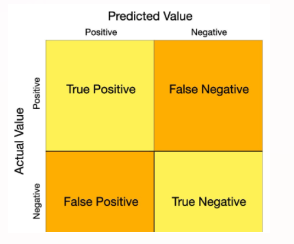

In [98]:
pred1a = mod1.predict_proba(X_dev_scaled)

### Decision Tree

In [90]:
mod2 = DecisionTreeClassifier(random_state=1)
mod2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [94]:
# Define the classificationMetrics function
def classificationMetrics(y, yhat):
    res = {'Accuracy': metrics.accuracy_score(y, yhat)}
    return res

pred2 = mod2.predict(X_dev)
model_dict = {'model': "Decision Tree"}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([{**model_dict, **classificationMetrics(y_dev, pred2)}])

# Append to models_list using pd.concat
models_list = pd.concat([models_list, metrics_df], ignore_index=True)

models_list

,model,Accuracy
0,Logistic Regression,0.817855
1,Decision Tree,0.738136


In [95]:
pd.crosstab(y_dev, pred2)

col_0,Dropout,Enrolled,Graduate
Target,,,
Dropout,3085,579,303
Enrolled,567,1164,679
Graduate,331,747,4788


### Random Forest

In [101]:
mod3 = RandomForestClassifier(random_state=1)
mod3.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [102]:
pred3 = mod3.predict(X_dev)
model_dict = {'model': "RandomForest"}

metrics_dict = classificationMetrics(y_dev, pred3)

# Append to models_list using pd.concat
new_row = pd.DataFrame({**model_dict, **metrics_dict}, index=[0])
models_list = pd.concat([models_list, new_row], ignore_index=True)

models_list

,model,Accuracy
0,Logistic Regression,0.817855
1,Decision Tree,0.738136
2,RandomForest,0.999837
3,RandomForest,0.826513


<AxesSubplot:ylabel='Count'>

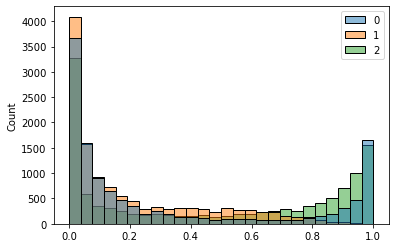

In [103]:
pred3a = mod3.predict_proba(X_dev)
# sns.distplot(pred3a)
sns.histplot(pred3a)

In [104]:
pd.crosstab(y_dev, pred3)

col_0,Dropout,Enrolled,Graduate
Target,,,
Dropout,3250,454,263
Enrolled,282,1452,676
Graduate,84,365,5417


### Adaptive Boosting (ADABoost)

In [107]:
mod4 = AdaBoostClassifier(random_state=1)
mod4.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [108]:
pred4 = mod4.predict(X_dev)
model_dict = {'model': "ADABoost"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred4)}, ignore_index=True)
models_list

,model,Accuracy
0,Logistic Regression,0.817855
1,Decision Tree,0.738136
2,RandomForest,0.999837
3,RandomForest,0.826513
4,ADABoost,0.817855
5,ADABoost,0.818182


In [109]:
pd.crosstab(y_dev, pred4)

col_0,Dropout,Enrolled,Graduate
Target,,,
Dropout,3142,565,260
Enrolled,223,1484,703
Graduate,114,361,5391


### Gradient Boosting Machine (GBM)

In [110]:
mod5 = GradientBoostingClassifier(random_state=1)
mod5.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [111]:
pred5 = mod5.predict(X_dev)
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred5)}, ignore_index=True)
models_list

,model,Accuracy
0,Logistic Regression,0.817855
1,Decision Tree,0.738136
2,RandomForest,0.999837
3,RandomForest,0.826513
4,ADABoost,0.817855
5,ADABoost,0.818182
6,GBM,0.823981


In [112]:
pd.crosstab(y_dev, pred5)

col_0,Dropout,Enrolled,Graduate
Target,,,
Dropout,3252,452,263
Enrolled,278,1460,672
Graduate,95,395,5376


### Support Vector Machine (SVM)

Here again, standardization is needed.

In [113]:
mod6 = SVC(probability=True)
mod6.fit(X_train_scaled,y_train_scaled)

SVC(probability=True)

In [114]:
pred6 = mod6.predict(X_dev_scaled)
model_dict = {'model': "SVM"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev_scaled, pred6)}, ignore_index=True)
models_list

,model,Accuracy
0,Logistic Regression,0.817855
1,Decision Tree,0.738136
2,RandomForest,0.999837
3,RandomForest,0.826513
4,ADABoost,0.817855
5,ADABoost,0.818182
6,GBM,0.823981
7,SVM,0.819897


In [115]:
pd.crosstab(y_dev_scaled, pred6)

col_0,Dropout,Enrolled,Graduate
Target,,,
Dropout,3131,547,289
Enrolled,226,1424,760
Graduate,86,297,5483


## Model Selection

In [121]:
models_list.sort_values('Accuracy',ascending=False)

,model,Accuracy
2,RandomForest,0.999837
3,RandomForest,0.826513
6,GBM,0.823981
7,SVM,0.819897
5,ADABoost,0.818182
0,Logistic Regression,0.817855
4,ADABoost,0.817855
1,Decision Tree,0.738136


RandomForest and GBM are the best models according to Accuracy metric. Our next step will be Fine-Tuning for hyperparameters optimization using Grid search and Random search.